# IRIS Dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his paper. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

### Import Packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Load Datasets

In [3]:
iris = pd.read_csv("Iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


![title](iris.jfif)

### Data Exploration

In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
iris.drop(["Id"],axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
import matplotlib.pyplot as plt

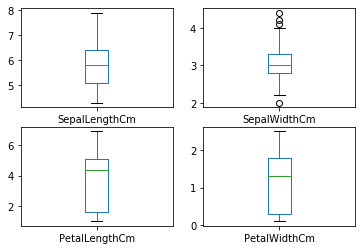

In [11]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

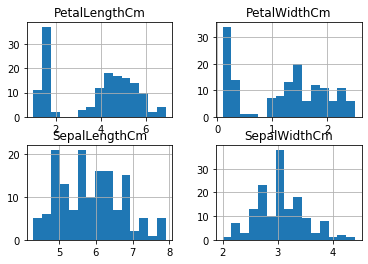

In [12]:
iris.hist(bins=15)
plt.show()

In [13]:
from pandas.plotting import scatter_matrix

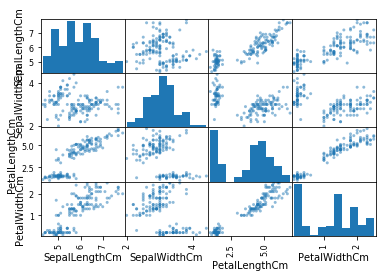

In [14]:
scatter_matrix(iris)
plt.show()

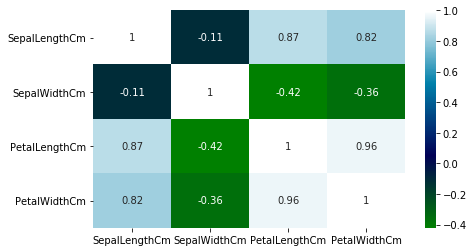

In [15]:
import seaborn as sns
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='ocean') 
plt.show()

### Split data into train and test set

In [16]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

C:\Users\mauli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [22]:
model.predict(np.array([[2,3,4,5]]))

array(['Iris-virginica'], dtype=object)

In [23]:
import pickle
pickle.dump(model, open("flower-v1.pkl", "wb"))
model_pk = pickle.load(open("flower-v1.pkl", "rb"))
model_pk.predict(np.array([[2,3,4,5]]))

array(['Iris-virginica'], dtype=object)

In [24]:
from flask import Flask, request
import pickle
import numpy as np

In [25]:
app = Flask(__name__)

In [26]:
model_pk = pickle.load(open("flower-v1.pkl", "rb"))

In [27]:
@app.route('/api_predict', methods=["GET", "POST"])
def api_predict():
    if request.method == "GET":
        return "Please send Post Request"
    elif request.method == "POST":
        data = request.get_json()
        
        sepal_length = data['sepal_length'] 
        sepal_width = data["sepal_width"]
        petal_length = data["petal_length"]
        petal_width = data["petal_width"]
        
        in1 = np.array([[sepal_length, sepal_width , petal_length, petal_width]])
        
        prediction = model_pk.predict(in1)
        
        return str(prediction)
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/May/2020 10:51:21] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [30/May/2020 10:51:27] "GET /api_predict HTTP/1.1" 200 -
